In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
data = load_breast_cancer()

In [45]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
X = pd.DataFrame(data.data,columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
y = pd.DataFrame(data.target)

In [49]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=42)

In [52]:
X_train.shape,y_train.shape

((398, 30), (398, 1))

In [53]:
X_test.shape,y_test.shape

((171, 30), (171, 1))

In [54]:
LR = LogisticRegression().fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
y_predict = LR.predict(X_test)

In [56]:
print('Score :',accuracy_score(y_test,y_predict))

Score : 0.9707602339181286


In [57]:
print('Confusion Matrix is')
confusion_matrix(y_test,y_predict)

Confusion Matrix is


array([[ 59,   4],
       [  1, 107]], dtype=int64)

In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [59]:
from sklearn.metrics import roc_auc_score,roc_curve

In [60]:
pred_prob = LR.predict_proba(X_test)

In [61]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [62]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [63]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])

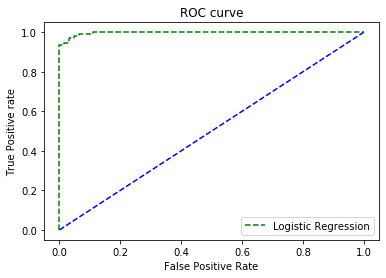

In [64]:
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [ ]:
Model with standar

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scalar = StandardScaler()

In [91]:
X1 = scalar.fit_transform(X)

In [92]:
new_X = pd.DataFrame(X1,columns=X.columns)

In [93]:
new_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
...     new_X, y, test_size=0.33, random_state=42)

In [95]:
model = LogisticRegression().fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
model_predcition = model.predict(X_test)

In [97]:
print('Score :',accuracy_score(y_test,model_predcition))

Score : 0.9787234042553191


In [98]:
print('Confusion matrix is :')
confusion_matrix(y_test,model_predcition)

Confusion matrix is :


array([[ 66,   1],
       [  3, 118]], dtype=int64)

## Feature Selection

In [99]:
from sklearn.feature_selection import SelectKBest,chi2

In [119]:
best_feature = SelectKBest(chi2,k=30).fit(X,y)

In [120]:
best_feature.scores_

array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01])

In [141]:
ordered_features = pd.Series(best_feature.scores_,index=X.columns).nlargest(25)
ordered_features

worst area                 112598.431564
mean area                   53991.655924
area error                   8758.504705
worst perimeter              3665.035416
mean perimeter               2011.102864
worst radius                  491.689157
mean radius                   266.104917
perimeter error               250.571896
worst texture                 174.449400
mean texture                   93.897508
worst concavity                39.516915
radius error                   34.675247
mean concavity                 19.712354
worst compactness              19.314922
worst concave points           13.485419
mean concave points            10.544035
mean compactness                5.403075
worst symmetry                  1.298861
concavity error                 1.044718
compactness error               0.613785
worst smoothness                0.397366
concave points error            0.305232
mean symmetry                   0.257380
worst fractal dimension         0.231522
mean smoothness 

In [142]:
ordered_features.index

Index(['worst area', 'mean area', 'area error', 'worst perimeter',
       'mean perimeter', 'worst radius', 'mean radius', 'perimeter error',
       'worst texture', 'mean texture', 'worst concavity', 'radius error',
       'mean concavity', 'worst compactness', 'worst concave points',
       'mean concave points', 'mean compactness', 'worst symmetry',
       'concavity error', 'compactness error', 'worst smoothness',
       'concave points error', 'mean symmetry', 'worst fractal dimension',
       'mean smoothness'],
      dtype='object')

In [143]:
x = new_X[['worst area', 'mean area', 'area error', 'worst perimeter',
       'mean perimeter', 'worst radius', 'mean radius', 'perimeter error',
       'worst texture', 'mean texture', 'worst concavity', 'radius error',
       'mean concavity', 'worst compactness', 'worst concave points','mean concave points', 'mean compactness', 'worst symmetry',
       'concavity error', 'compactness error','worst smoothness',
       'concave points error', 'mean symmetry', 'worst fractal dimension',
       'mean smoothness']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [145]:
model1 = LogisticRegression().fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [146]:
model1_prediction = model1.predict(X_test)

In [148]:
print('Accuracy Score after feature selection is :',accuracy_score(y_test,model1_prediction))

Accuracy Score after feature selection is : 0.9840425531914894


In [152]:
print('classification_report is :')
print('\n')
print(classification_report(y_test,model1_prediction))

classification_report is :


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [155]:
print('Confusion matrix after feature selection is')
print('\n')
print(confusion_matrix(y_test,model1_prediction))

Confusion matrix after feature selection is


[[ 66   1]
 [  2 119]]


### Key Points

In [ ]:
1. Accuracy increased after performing normalization(standard scaling) and feature selection
2. Type 1 error and Type 2 error also get reduced after feature selection 